In [18]:
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow.keras.applications.imagenet_utils import decode_predictions, preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np
import requests
from PIL import Image
from io import BytesIO

In [11]:
def get_image(image_url):
    response = requests.get(image_url)
    image = Image.open(BytesIO(response.content))
    image = np.array(image)
    image = tf.cast(image, tf.float32)
    image = tf.reshape(image, (1, image.shape[0],image.shape[1],3))
    return image

In [8]:
base_layer = hub.load("https://tfhub.dev/adityakane2001/regnety400mf_classification/1")

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x7f54eea0ce80>

In [21]:
image = get_image("https://images.pexels.com/photos/6474755/pexels-photo-6474755.jpeg?auto=compress&cs=tinysrgb&dpr=3&h=750&w=1260")

In [19]:
predictions = base_layer(image)

UnimplementedError: Graph execution error:

Fused conv implementation does not support grouped convolutions for now.
	 [[{{node Stage_0_YBlock_0/Stage_0_YBlock_0_relu3x3/Relu}}]] [Op:__inference_restored_function_body_96582]

In [2]:
def make_model(base_model, num_classes):
    finetuning_model = tf.keras.Sequential([
        tf.keras.layers.InputLayer((224, 224, 3)),
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(num_classes)
    ])
    return finetuning_model
base_layer = hub.KerasLayer("https://tfhub.dev/adityakane2001/regnety400mf_feature_extractor/1", trainable=True)
 ##TODO: update link

model = make_model(base_layer, 5)

model.build(input_shape=(None, 224, 224, 3))
model.summary()

2023-01-08 20:06:54.261169: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-08 20:06:54.305565: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2023-01-08 20:06:54.305589: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-01-08 20:06:54.305954: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neur

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 7, 7, 440)         3617881   
                                                                 
 global_average_pooling2d (G  (None, 440)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 5)                 2205      
                                                                 
Total params: 3,620,086
Trainable params: 3,596,671
Non-trainable params: 23,415
_________________________________________________________________


## Image/Input preprocessing

In [3]:
# Check if target image exists
img_path = '../assets/test_data/AM_DB9.jpg'
%ls -la $img_path

-rw-rw-r-- 1 hhughes hhughes 133540 Jan  8 12:35 ../assets/test_data/AM_DB9.jpg


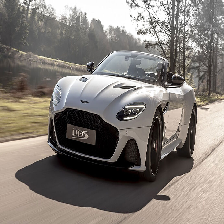

In [4]:
# Load image to perform classification
img = image.load_img(img_path, target_size=(224, 224))
img

In [5]:
# Preprocess image
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
x.shape

(1, 224, 224, 3)

## Test model

In [6]:
# Perform prediction
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

UnimplementedError: Graph execution error:

Fused conv implementation does not support grouped convolutions for now.
	 [[{{node Stage_0_YBlock_0/Stage_0_YBlock_0_relu3x3/Relu}}]] [Op:__inference_predict_function_33104]

## Save model

In [55]:
models_base_path = './saved_models'
model_name = 'xception_classification'
# keep follow notation for the version, otherwise it fails....
model_version = '001'
model_path = os.path.join(models_base_path, model_name, model_version)
print(model_path)
model.save(model_path)

./saved_models/xception_classification/00000001


INFO:tensorflow:Assets written to: ./saved_models/xception_classification/00000001/assets


INFO:tensorflow:Assets written to: ./saved_models/xception_classification/00000001/assets


In [ ]:
models_base_path = './saved_models'
model_name = 'xception_classification'
# keep follow notation for the version, otherwise it fails....
model_version = '001'
model_path = os.path.join(models_base_path, model_name, model_version)
print(model_path)
model.save(model_path)

Since local python instance not working, the use:
https://colab.research.google.com/github/AdityaKane2001/regnety/blob/main/RegNetY_models_in_TF_2_5.ipynb